In [1]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve

from pycaret.classification import *
import xgboost as xgb
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import warnings

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me


In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0, names=[
                     'happy', 
                     'order_delivered',
                     'order_correct',
                     'menu_complete',
                     'price',
                     'courier',
                     'app'
                 ])

In [3]:
df.dtypes

happy              int64
order_delivered    int64
order_correct      int64
menu_complete      int64
price              int64
courier            int64
app                int64
dtype: object

In [4]:
df = df[['happy','order_delivered', 'menu_complete', 'courier']]

In [5]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(df, target = 'happy')

,Description,Value
0,Session id,5046
1,Target,happy
2,Target type,Binary
3,Original data shape,"(126, 4)"
4,Transformed data shape,"(126, 4)"
5,Transformed train set shape,"(88, 4)"
6,Transformed test set shape,"(38, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [6]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7167,0.6838,0.8150,0.7238,0.7590,0.4175,0.4343,0.0120
gbc,Gradient Boosting Classifier,0.6694,0.6125,0.7900,0.6813,0.7234,0.3176,0.3386,0.0060
dt,Decision Tree Classifier,0.6583,0.6619,0.6600,0.6888,0.6651,0.3116,0.3167,0.0030
xgboost,Extreme Gradient Boosting,0.6361,0.6100,0.7300,0.6560,0.6820,0.2575,0.2634,0.0060
et,Extra Trees Classifier,0.6347,0.6450,0.6850,0.6571,0.6647,0.2615,0.2675,0.0110
lr,Logistic Regression,0.6125,0.6762,0.6850,0.6489,0.6540,0.2091,0.2181,0.1570
ridge,Ridge Classifier,0.6125,0.0000,0.6850,0.6489,0.6540,0.2091,0.2181,0.0020
lda,Linear Discriminant Analysis,0.6125,0.6338,0.6850,0.6489,0.6540,0.2091,0.2181,0.0020
knn,K Neighbors Classifier,0.5903,0.5831,0.7300,0.6239,0.6586,0.1550,0.1765,0.0040
nb,Naive Bayes,0.5778,0.6475,0.7500,0.6013,0.6566,0.1252,0.1461,0.0030


In [7]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5046, verbose=0, warm_start=False)

In [8]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5046, verbose=0, warm_start=False)


In [8]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

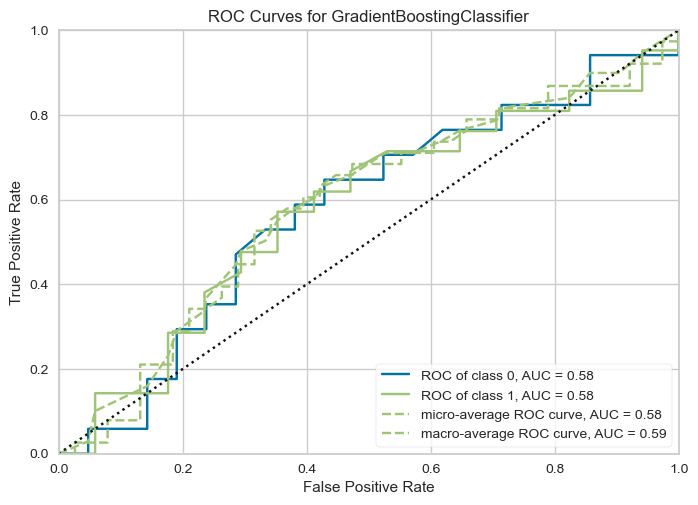

In [9]:
s.plot_model(best, plot = 'auc')

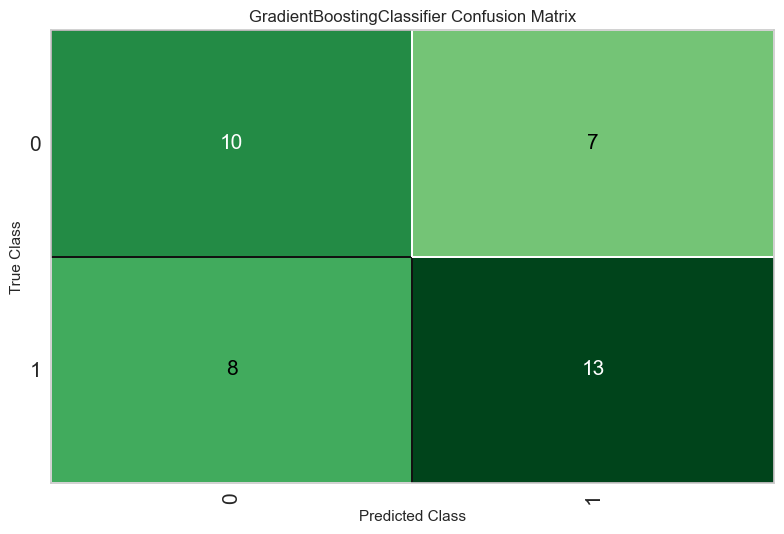

In [10]:
s.plot_model(best, plot = 'confusion_matrix')